# Машинное обучение, ФКН ВШЭ

## Практическое задание 4. Классификация. 

### Общая информация
Дата выдачи: 20.10.2020

Мягкий дедлайн: 01:59MSK 02.11.2020 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 01:59MSK 05.11.2020

### О задании

В этом задании вы:
- ознакомитесь с тем, что происходит "внутри" метода опорных векторов и логистической регрессии
- познакомитесь с калибровкой вероятности
- изучите методы трансформации переменных и методы отбора признаков
- попробуете оценить экономический эффект модели


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания переименуйте получившийся файл *.ipynb в соответствии со следующим форматом: homework-practice-04-classification-Username.ipynb, где Username — ваша фамилия и имя на латинице именно в таком порядке (например, homework-practice-04-classification-IvanovIvan.ipynb).

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

# Часть 0. SVM, LR и калибровка вероятностей. 

Сгенерируем синтетические данные.

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов и логистической регрессии.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили линейный вариант без ядрового перехода, что соответствует линейному ядру (`LinearSVC` или же `SVC(kernel='linear')` в `sklearn.svm`). Подберите параметр регуляризации `C` (можете воспользоваться кросс-валидацией или отделить валидационную выборку от обучающей). 

In [3]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

parameters = {'C':np.logspace(-3, 2, 5)}

model = GridSearchCV(LinearSVC(tol=10), parameters)
model.fit(X_train, y_train)

best_c = model.best_params_['C']
print("Best C = %.4f" % best_c)

Best C = 0.0010


На тестовой части посчитайте AUC-ROC, AUC-PR с точностью до 5 знаков. Постройте ROC и PR кривые, сравните их с ответами случайного классификатора. Заметим, что с помощью `sklearn` можно посчитать обе метрики двумя разными способами - в чем их различия? Сравните результаты. 

Подсчет площадь с помощью roc_auc_score & average_precision_score:
AUC-ROC = 0.84742
AUC-PR = 0.82955


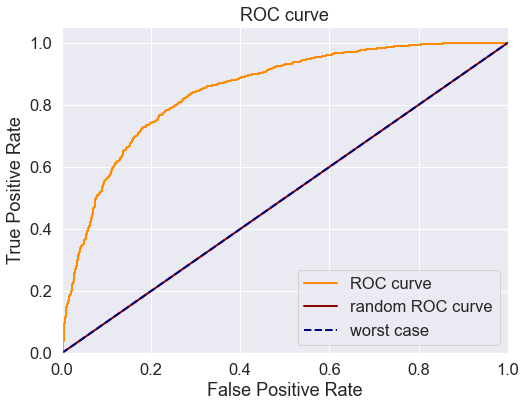

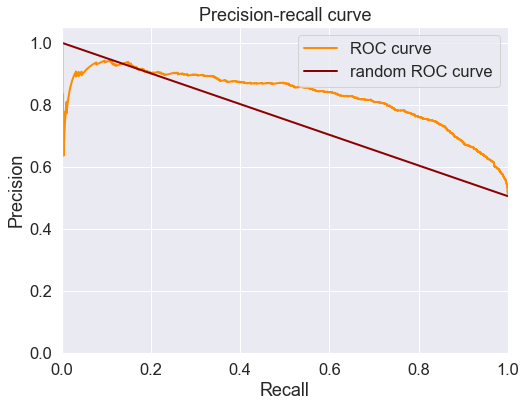

Подсчет площади с помощью auc:
AUC-ROC = 0.84742
AUC-PR = 0.82929


In [4]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score, auc, precision_score
import seaborn as sns
from sklearn.dummy import DummyClassifier


classifier = LinearSVC(C=best_c)
classifier.fit(X_train, y_train)
y_pred_SVC = classifier.decision_function(X_test)
dummy_clf = DummyClassifier(strategy="uniform", random_state = 10)
dummy_clf.fit(X_train, y_train)
y_dummy_pred = dummy_clf.predict_proba(X_test)[:, 1]


print('Подсчет площадь с помощью roc_auc_score & average_precision_score:')
print("AUC-ROC = %.5f" % roc_auc_score(y_test, y_pred_SVC))
print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred_SVC))


sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
fpr_SVC, tpr_SVC, thresholds = roc_curve(y_test, y_pred_SVC)
fpr_dummy, tpr_dummy, thresholds_dummy = roc_curve(y_test, y_dummy_pred)
lw = 2
plt.plot(fpr_SVC, tpr_SVC, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot(fpr_dummy, tpr_dummy, color='darkred',
         lw=lw, label='random ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='worst case')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision_SVC, recall_SVC, thresholds_SVC = precision_recall_curve(y_test, y_pred_SVC)
precision_dummy, recall_dummy, thresholds_dummy = precision_recall_curve(y_test, y_dummy_pred)
plt.plot(recall_SVC, precision_SVC, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot(recall_dummy, precision_dummy, color='darkred',
         lw=lw, label='random ROC curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print('Подсчет площади с помощью auc:')
print("AUC-ROC = %.5f" % auc(fpr_SVC, tpr_SVC))
print("AUC-PR = %.5f" % auc(recall_SVC, precision_SVC))


**Ответ:** 
1) Видно, что случайный классификатор даёт заметно более худший результат, вероятность правильности предсказания, судя по AUC-ROC 50%, то есть оно бессмысленно.

2) Площадь под кривой можно посчитать "в лоб" методом трапеций auc, или через функции *roc_auc_score* и *average_precision_score*, через подсчёт среднего значения. Как видим, разница между методами в десятитысячных. Говоря о различиях между *ROC* и *PR*. В различиных источниках утверждается, что auc выдаёт решение точнее, так как действует более математически, а другие функции могут некорректно обрабатывать случай имбалансной классификации.


А теперь проделайте все то же самое для логистической регрессии (LR) — обучение, подбор параметра регуляризации (используйте L2-регуляризацию), вычисление всех метрик и построение кривых. Сравните результаты LR и SVM с точки зрения всех вычисленных критериев качества, объясните различия (если они есть).

Best c = 0.31623
AUC-ROC LR = 0.84787
AUC-ROC SVC = 0.84742
AUC-PR LR = 0.82940
AUC-PR SVC = 0.82955


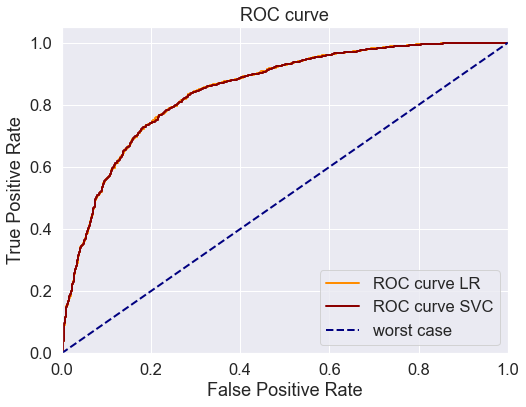

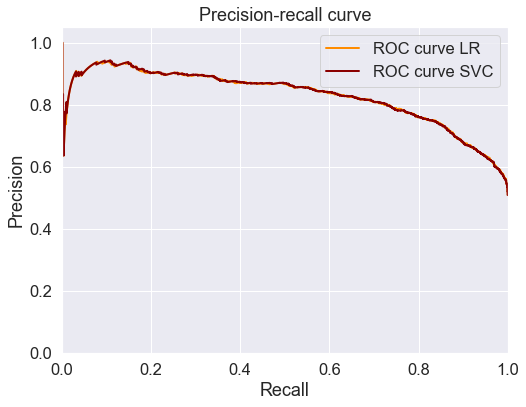

In [5]:
from sklearn.linear_model import LogisticRegression

parameters = {'penalty':['l2'], 'C':np.logspace(-3, 2, 5)}

model = GridSearchCV(LogisticRegression(), parameters)
model.fit(X_train, y_train)

best_c = model.best_params_['C']
print("Best c = %.5f" % best_c)

classifier = LogisticRegression(C=best_c)
classifier.fit(X_train, y_train)
y_pred = classifier.decision_function(X_test)

print("AUC-ROC LR = %.5f" % roc_auc_score(y_test, y_pred))
print("AUC-ROC SVC = %.5f" % roc_auc_score(y_test, y_pred_SVC))
print("AUC-PR LR = %.5f" % average_precision_score(y_test, y_pred))
print("AUC-PR SVC = %.5f" % average_precision_score(y_test, y_pred_SVC))

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve LR')
plt.plot(fpr_SVC, tpr_SVC, color='darkred',
         lw=lw, label='ROC curve SVC')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='worst case')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='ROC curve LR')
plt.plot(recall_SVC, precision_SVC, color='darkred',
         lw=lw, label='ROC curve SVC')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

**Ответ:** Визуально работа алгоритмов практически не отличается, в численных результатов разница заметна в десятитысячных. Глядя на площадь под кривой PR можно сказать, что метод опорных векторов дает чуть более лучший результат. Возможно это потому, что данный метод менее чувствителен к выбросам, пытается максимизировать расстояние между векторами поддержки, чем оптимизирует решение для обоих классов, в то время как логистическая регрессия работает иначе.

В названии метода опорных векторов присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью `make_classification` с 2 признаками, обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут `support_vectors_`). В этот раз, если необходимо, вместо `LinearSVC` воспользуйтесь `SVC(kernel='linear')`, так как только в нём есть информация об опорных векторах.

In [6]:
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0,
    random_state=16)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

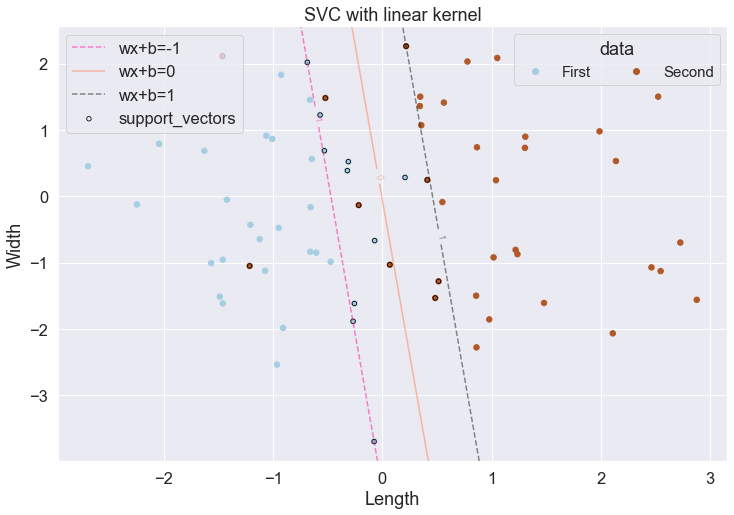

In [7]:
from sklearn.svm import SVC


parameters = {'kernel':['linear'], 'C':np.logspace(-3, 2, 5)}
clf = GridSearchCV(SVC(), parameters)
clf.fit(X_train, np.array(y_train))
best_c = clf.best_params_['C']
clf = SVC(kernel='linear', C=best_c)
clf.fit(X_train, y_train)

plt.figure(figsize=(12,8))

# plot the decision function
ax = plt.gca()
scatter = ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=['First', 'Second'], ncol=2, fontsize=15, title='data')
ax.add_artist(legend1)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
CS = ax.contour(XX, YY, Z, colors=['deeppink', 'coral', 'k'], levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
labels = ['wx+b=-1', 'wx+b=0','wx+b=1']
for i in range(len(labels)):
    CS.collections[i].set_label(labels[i])
    
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=20,
           linewidth=0.8, facecolors='none', edgecolors='black', label='support_vectors')

plt.legend(loc='upper left')
ax.set_xlabel('Length')
ax.set_ylabel('Width')
ax.set_title('SVC with linear kernel')
ax.clabel(CS, fontsize=9, inline=1)
plt.show()

В отличие от метода опорных векторов, логистическая регрессия не пытается построить разделяющую гиперплоскость, а приближает в каждой точке пространства объектов правдоподобие положительных ответов $p(y=+1|x)$. Попробуйте нарисовать это распределение на плоскости, не забудьте отметить на ней все объекты. Вам может помочь функция `plt.pcolor`.

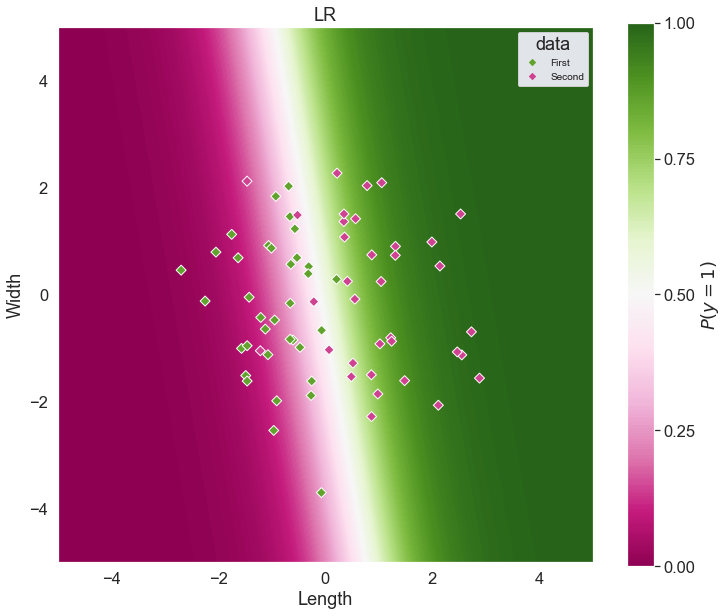

In [8]:
parameters = {'penalty':['l2'], 'C':np.logspace(-3, 2, 5)}
model = GridSearchCV(LogisticRegression(), parameters)
model.fit(X_train, y_train)
best_c = model.best_params_['C']
classifier = LogisticRegression(C=best_c)
classifier.fit(X_train, y_train)


xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = classifier.predict_proba(grid)[:, 1].reshape(xx.shape)

f, ax = plt.subplots(figsize=(12, 10))
contour = ax.contourf(xx, yy, probs, 200, cmap="PiYG",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

scatter = ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, s=50,
           cmap="PiYG_r", marker='D', vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)
legend1 = ax.legend(handles=scatter.legend_elements()[0], labels=['First', 'Second'], ncol=1, fontsize=10, title='data')
ax.add_artist(legend1)

ax.set(aspect="equal",
       xlim=(-5, 5), ylim=(-5, 5),
       xlabel="Length", ylabel="Width")
ax.set_title('LR')

plt.show()

__Задание 2.__ Калибровка вероятностей.

__(1 балл)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [9]:
def plot_calibration_curve(y_test, preds, name):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 10
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2) 
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds <= r)]))
    plt.figure(figsize=(6,6))
    plt.xlabel('Centers')
    plt.ylabel('Proportion of answers "1"')
    plt.title(name)
    plt.plot(bin_middle_points, bin_real_ratios, color='purple')
    plt.ylim([-0.05, 1.05])
    plt.grid(True)
    plt.show()

Сгенерируйте синтетический датасет аналогично использованному в самом первом задании. Постройте калибровочные кривые на тестовой части для логистической регрессии и метода опорных векторов (не забудьте перевести его предсказания в $[0;1]$). Изучите распределение ответов классификаторов (постройте гистограммы с помощью `plt.hist`). Чем они различаются? Чем вы можете объяснить это?

In [10]:
X, y = make_classification(
    n_samples=10000, n_features=10, n_informative=5, n_redundant=5,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

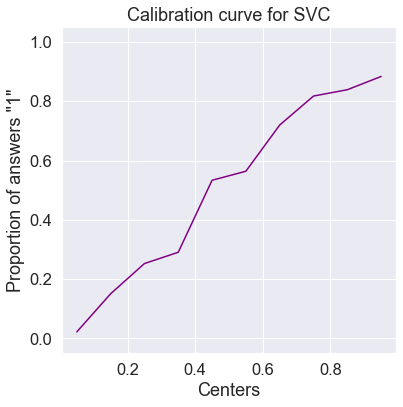

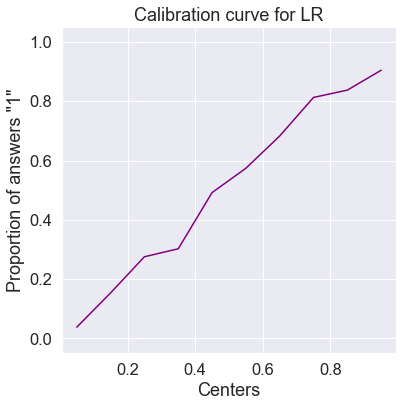

In [11]:
name=['Calibration curve for SVC', 'Calibration curve for LR']

parameters = {'kernel':['linear'], 'C':np.logspace(-3, 2, 5)}
clf_SVC = GridSearchCV(SVC(), parameters)
clf_SVC.fit(X_train, y_train)
best_c = clf_SVC.best_params_['C']
clf_SVC = SVC(kernel='linear', C=best_c, probability=True)
clf_SVC.fit(X_train, y_train)
y_pred_SVC = clf_SVC.predict_proba(X_test)[:, 1]

parameters = {'penalty':['l2'], 'C':np.logspace(-3, 2, 5)}
model_LR = GridSearchCV(LogisticRegression(), parameters)
model_LR.fit(X_train, y_train)
best_c = model_LR.best_params_['C']
clf_LR = LogisticRegression(C=best_c)
clf_LR.fit(X_train, y_train)
y_pred_LR = clf_LR.predict_proba(X_test)[:, 1]

plot_calibration_curve(y_test, y_pred_SVC, name[0])
plot_calibration_curve(y_test, y_pred_LR, name[1])

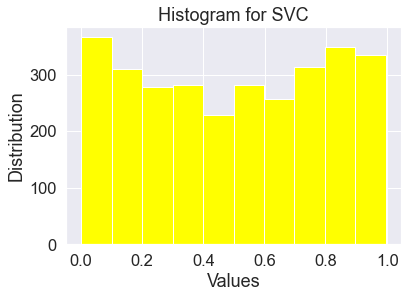

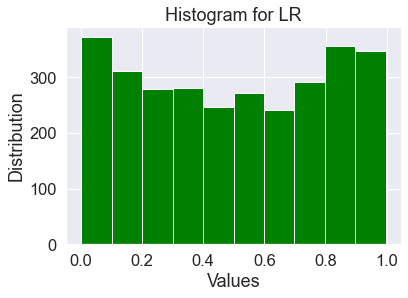

In [12]:
plt.hist(y_pred_SVC, color='yellow')
plt.ylabel('Distribution')
plt.xlabel('Values')
plt.title('Histogram for SVC')
plt.show()
plt.hist(y_pred_LR, color='green')
plt.ylabel('Distribution')
plt.xlabel('Values')
plt.title('Histogram for LR')
plt.show()

**Ответ:** Заметим, что в общем тенденция на гистограммах для обоих методов идентична и различия вообще трудно заметить. Возможно наибольшее расхождение происходит в отметке *Values = 0.5*. Это срединная вероятность, относительно которой может зависеть, какой ответ выдаст классификатор. Такая критическая величина объяснима тем, что методы по-разному определяют вероятности принадлежности к классу.

Воспользуйтесь `CalibratedClassifierCV` из `sklearn` для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

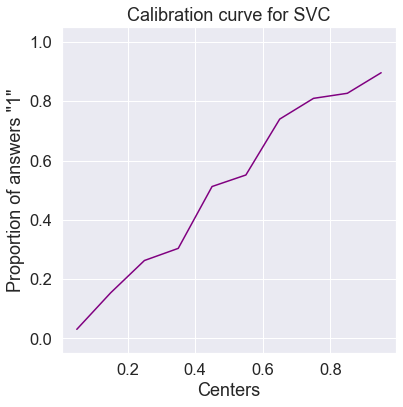

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


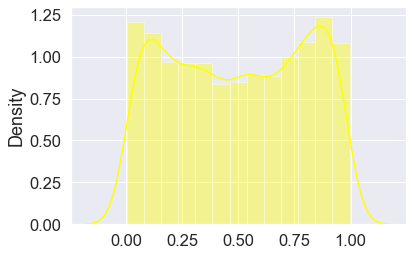

In [13]:
from sklearn.calibration import CalibratedClassifierCV


model = SVC(kernel='linear', C=0.0010)
calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=10)
calibrated.fit(X_train, y_train)
probs = calibrated.predict_proba(X_test)[:, 1]
plot_calibration_curve(y_test, probs, name[0])
ax = sns.distplot(probs, color='yellow')

**Ответ:** Заметно, что калибровочная кривая улучшилась, так как сейчас она ближе к диагонали, а из формулировки работы функции: идеальное предсказание диагонально.

__Бонусное задание (0.5 балла).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты. Ключевые слова для вдохновения: `Platt`, `Isotonic`.

In [14]:
#your code here

# Часть 1. Работа с переменными.

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

__Подготовка данных.__

Загрузим данные [UCI Bank Marketing Dataset](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Этот датасет содержит информацию о банковском телефонном маркетинге, объектом в нем является телефонный звонок потенциальному клиенту с предложением некоторой услуги (утверждается, что это краткосрочный депозит), целевой переменной - ответ клиента (согласился ли он открыть депозит?). В качестве признакового описания используются характеристики клиента (образование, брак и т.д.), данные о звонке и различные экономические индикаторы - более подробная информация представлена в файле `bank-additional-names.txt`.

In [15]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

--2021-12-23 13:15:37--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Распознаётся archive.ics.uci.edu (archive.ics.uci.edu)… 128.195.10.252
Подключение к archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 444572 (434K) [application/x-httpd-php]
Сохранение в: «bank-additional.zip»

bank-additional.zip 100%[===================>] 434,15K   404KB/s    за 1,1s    

2021-12-23 13:15:39 (404 KB/s) - «bank-additional.zip» сохранён [444572/444572]

Archive:  bank-additional.zip
   creating: bank-additional/
  inflating: bank-additional/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/bank-additional/
  inflating: __MACOSX/bank-additional/._.DS_Store  
  inflating: bank-additional/.Rhistory  
  inflating: bank-additional/bank-additional-full.csv  
  inflating: bank-additional/bank-additional-names.txt  
  inflating: bank-additional/bank-additional.csv  
  in

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__Задание 3 (0.5 балла).__ Разделите выборку на обучающую и тестовую в соотношении 3:1. Зафиксируйте `random_state=777`, также используйте `stratify`. Один из столбцов в данных не несет информации для решения задачи — какой? Отбросьте его. 



In [17]:
y = df["y"]
X = df.drop(columns=["y", "duration"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y)

In [18]:
y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Закодируйте категориальные признаки с помощью `OrdinalEncoder`. Посчитайте качество (в этом задании будем работать c `AUC-PR`) при применении логистической регрессии. Замерьте время, потребовавшееся на обучение модели (с учетом кодирования признаков).

__Вопрос__: почему в данном задании мы выбрали метрикой именно `AUC-PR`, а не, к примеру, `AUC-ROC`?

__Ваш ответ__: Проблема метрики *AUC-ROC* заключается  неправильном отображении предсказаний несбалансированных классов, когда количество одних ответов намного больше, чем других. Заметно, что отрицательных ответов в примерно 8 раз больше, чем положительных. Значит лучше использовать более стабильных показатель качества.

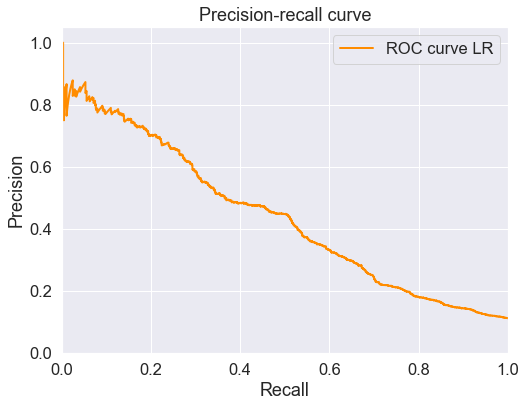

AUC-PR = 0.43976
Время обучения: 2.204986095428467


In [19]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import time as t


categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', \
               'month', 'day_of_week', 'poutcome']

start = t.time()

column_transformer = ColumnTransformer([
    ('oe', OrdinalEncoder(), categorical)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('oe', column_transformer),
    ('logreg', LogisticRegression(max_iter=100000))
])

model = pipeline.fit(X_train, y_train)

fin = t.time()

y_pred = model.decision_function(X_test)

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label='yes')
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred, pos_label='yes'))
print("Время обучения:", fin - start)

__Задание 4 (0.5 балла).__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на кодирование категориальных признаков и обучение модели.



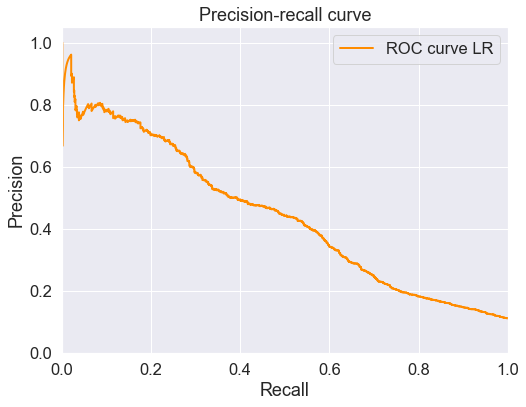

AUC-PR = 0.44436
Время обучения: 1.1274092197418213


In [20]:
from sklearn.preprocessing import OneHotEncoder


start = t.time()

column_transformer = ColumnTransformer([
    ('oe', OneHotEncoder(handle_unknown="ignore"), categorical)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('oe', column_transformer),
    ('logreg', LogisticRegression(max_iter=100000))
])

model = pipeline.fit(X_train, y_train)

fin = t.time()

y_pred = model.decision_function(X_test)

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred, pos_label='yes')
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred, pos_label='yes'))
print("Время обучения:", fin - start)

Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирования категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

__Задание 5 (1 балл).__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Обучите логистическую регрессию и посмотрите на качество модели на тестовом множестве. Сравните время обучения с предыдущими экспериментами (с учетом кодирования признаков). Заметили ли вы что-то интересное?


__Бонус (1 балл)__: Здесь и далее реализуйте вычисление счетчиков с помощью трансформера (наследуйтесь от классов `BaseEstimator, TransformerMixin` из `sklearn.base`). Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики нужно считать только по обучающей выборке в методе `fit`. Ваш трансформер должен принимать при инициализации список из категориальных признаков и изменять только их. 


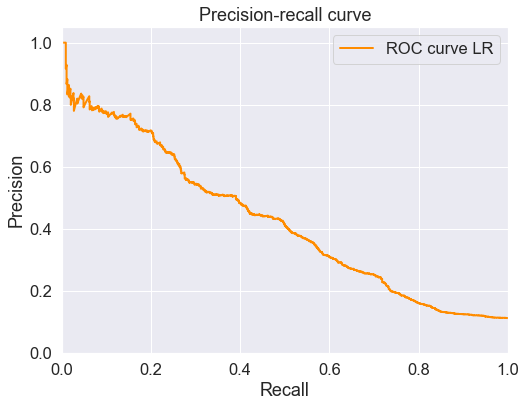

AUC-PR = 0.42589
Время обучения: 11.919795751571655


In [21]:
df_c = df.copy()

df_c['y'] = np.array([1 if x == 'yes' else 0 for x in df_c['y']])

start1 = t.time()

for category in categorical:
    for cat in df_c[category].unique():
        df_c.loc[df_c[category] == cat, category] = df_c.loc[df_c[category] == cat, 'y'].sum()\
        / df_c.loc[df_c[category] == cat, 'y'].count()
fin1 = t.time()

y = df_c["y"]
X = df_c.drop(columns=["y", "duration"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y) 

start2 = t.time()

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train, y_train)

fin2 = t.time()

y_pred = clf.predict_proba(X_test)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin1 - start1) + (fin2 - start2))

**Ответ:** Ощущение, что ничего интересного не произошло. Работает немного быстрее.

In [22]:
#your code here

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__Задание 6.__ Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (постарайтесь найти баланс между борьбой с переобучением и сохранением полезности признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы.

__(0.5 балла)__

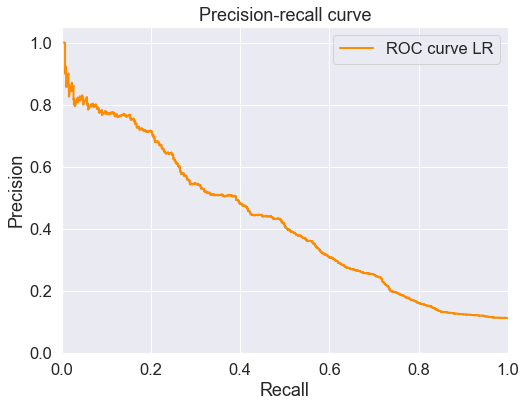

AUC-PR = 0.42586
Время обучения: 0.31442928314208984


In [23]:
for category in categorical:
    X_train.loc[:, category] += np.random.normal(scale=0.05, size=X_train.shape[0])
    X_test.loc[:, category] += np.random.normal(scale=0.05, size=X_test.shape[0])

start = t.time()

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train, y_train)

fin = t.time()

y_pred = clf.predict_proba(X_test)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin - start))

**Выводы:** Качество в выборке с шумом чуть хуже, чем качество с обычными счетчиками. В данный момент нам удалось перебороть переобучение.

__(Бонусная часть, 0.5 балла)__ Посчитайте корректные счётчики первым или вторым способов из описанных выше (не забудьте добавить и шум). 



In [24]:
#your code here

А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — доля объектов положительного класса в выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значением. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!


__Задание 7 (1 балл).__ Добавьте сглаживание, описанное выше и повторите эксперименты.

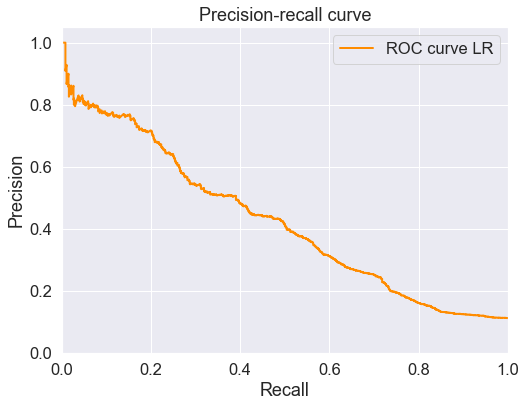

AUC-PR = 0.42589
Время обучения: 11.650644063949585


In [25]:
df_c = df.copy()

df_c['y'] = np.array([1 if x == 'yes' else 0 for x in df_c['y']])

start1 = t.time()

global_mean = df_c['y'].sum() / df_c['y'].count()

for category in categorical:
    for cat in df_c[category].unique():
        df_c.loc[df_c[category] == cat, category] = (df_c.loc[df_c[category] == cat, 'y'].sum() + 10 * global_mean) \
        / (df_c.loc[df_c[category] == cat, 'y'].count() + 10)
fin1 = t.time()

y = df_c["y"]
X = df_c.drop(columns=["y", "duration"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y) 

start2 = t.time()

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train, y_train)

fin2 = t.time()

y_pred = clf.predict_proba(X_test)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin1 - start1) + (fin2 - start2))

__Задание 8 (0.5 балла).__ В данных имеется признак "возраст клиента". Сейчас мы интерпретируем его как числовой, что в общем случае для линейной модели может быть неверной гипотезой. Тем не менее, у этого признака есть довольно много уникальных значений (сколько?), поэтому применять к нему one-hot кодирование может оказаться излишним. Попробуйте закодировать возраст с помощью счетчиков. Стало ли лучше?



Уникальных значений возраста 78


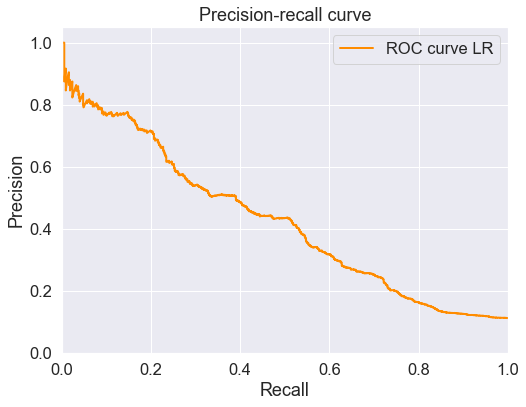

AUC-PR = 0.42694


In [26]:
print('Уникальных значений возраста', df['age'].nunique())

for category in df_c['age'].unique():
        df_c.loc[df_c['age'] == category, 'age'] = (df_c.loc[df_c['age'] == category, 'y'].sum() + 10 * global_mean) \
        / (df_c.loc[df_c['age'] == category, 'y'].count() + 10)
        
y = df_c["y"]
X = df_c.drop(columns=["y", "duration"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y) 

start2 = t.time()

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train, y_train)

fin2 = t.time()

y_pred = clf.predict_proba(X_test)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))

Можно пойти и в обратную сторону. У нас есть признаки "месяц и день недели" для звонка. Попробуйте интерпретировать их как числовые (месяц от 0 до 12, дни недели от 0 до 4). Стало ли лучше в этот раз?

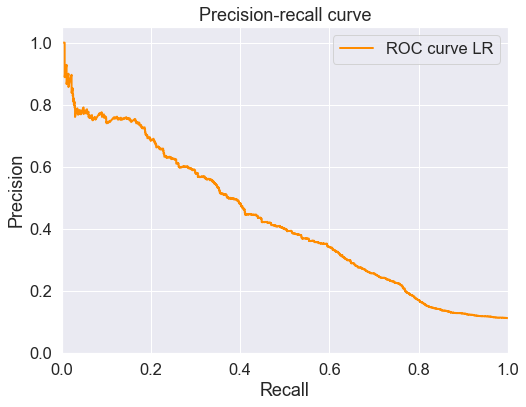

AUC-PR = 0.42902
Время обучения: 8.262443780899048


In [27]:
df2 = df.copy()

month = df2['month'].unique().tolist()
days = df2['day_of_week'].unique().tolist()

for i in range(len(month)):
    df2.loc[df2['month'] == month[i], 'month'] = i
    
for j in range(len(days)):
    df2.loc[df2['day_of_week'] == days[j], 'day_of_week'] = j

categorical.remove('month')
categorical.remove('day_of_week')
categorical.append('age')


df2['y'] = np.array([1 if x == 'yes' else 0 for x in df2['y']])

start1 = t.time()

global_mean = df2['y'].sum() / df2['y'].count()

for category in categorical:
    for cat in df2[category].unique():
        df2.loc[df2[category] == cat, category] = (df2.loc[df2[category] == cat, 'y'].sum() + 10 * global_mean) \
        / (df2.loc[df2[category] == cat, 'y'].count() + 10)

fin1 = t.time()

y = df2["y"]
X = df2.drop(columns=["y", "duration"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=777, stratify=y) 

start2 = t.time()

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train, y_train)

fin2 = t.time()

y_pred = clf.predict_proba(X_test)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin1 - start1) + (fin2 - start2))

**Ответ:** Стало лучше на тысячную. (В принципе в этой части качество не меняется очень сильно)

__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием вы заметили.

__Ответ:__ К сожалению, кажется, что счетчики все еще не такая хорошая замена one-hot кодированию. Среди плюсов одназначно меньший объём памяти и скорость работы, это видно из времени кодирования. В минусах видим худшее качество и зависимость (даже косвенную) от таргета.

# Часть 2. Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про банковский телефонный маркетинг.

In [28]:
df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

X = df.drop(columns=['duration', 'y'])
y = (df.y == 'yes')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777, stratify=y)

Как вы помните, в данных много категориальных признаков (сейчас давайте интерпретировать возраст как числовой). Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [29]:
categorical.remove('age')
categorical.append('month')
categorical.append('day_of_week')

column_transformer1 = ColumnTransformer([
    ('oh', OneHotEncoder(handle_unknown="ignore"), categorical)
], remainder='passthrough')

print('Categorical features:', *categorical, sep=', ')

pipeline = Pipeline(steps=[
    ('oh', column_transformer1),
    ('logreg', LogisticRegression(max_iter=100000))
])

model1 = pipeline.fit(X_train, y_train)

print("# features after OneHot:", column_transformer.transform(X_train).shape[1])

Categorical features:, job, marital, education, default, housing, loan, contact, poutcome, month, day_of_week
# features after OneHot: 62


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — `AUC-PR`. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

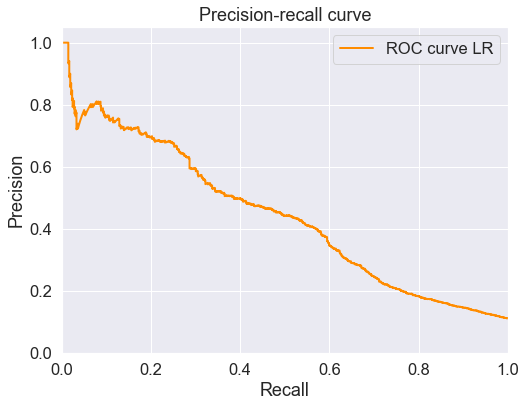

AUC-PR = 0.44247


In [30]:
y_pred = model1.decision_function(X_test)

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))

### Встроенные методы

Допустим, мы хотим оставить только 40 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8 (0.5 балла).__ Оставьте 40 признаков с наибольшим модулем соответствующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков.

Изменилось ли качество? Как?



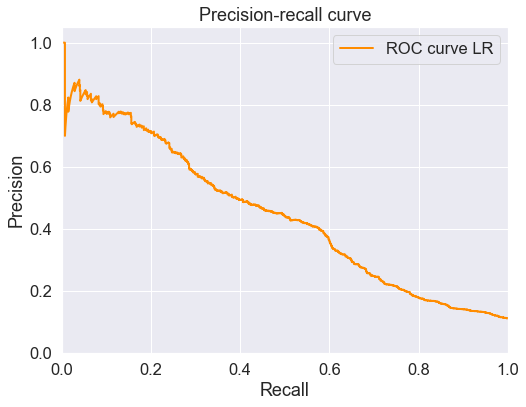

AUC-PR = 0.44576
Время обучения: 0.9739398956298828


In [31]:
start= t.time()

indices = pd.Series(abs(model1.named_steps['logreg'].coef_[0])).nlargest(40).index.values
X_train_new = column_transformer1.transform(X_train)[:, indices]
X_test_new = column_transformer1.transform(X_test)[:, indices]

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train_new, y_train)

fin = t.time()

y_pred = clf.predict_proba(X_test_new)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin - start))

**Ответ:** Качество стало хуже, да и работает долго.

А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отмасштабируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

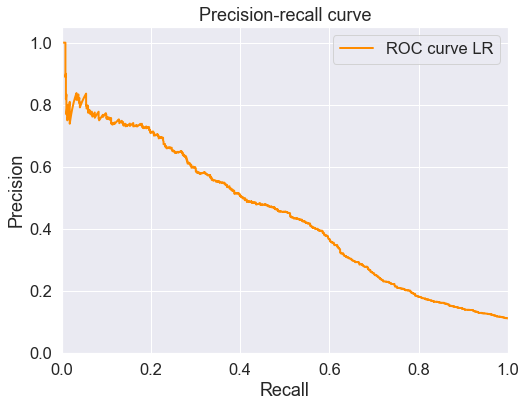

AUC-PR = 0.44652
Время обучения: 0.6829001903533936


In [32]:
numeric = ['age', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', \
          'cons.conf.idx', 'euribor3m', 'nr.employed']

column_transformer = ColumnTransformer([
    ('oh', OneHotEncoder(handle_unknown="ignore"), categorical), 
    ('sc', StandardScaler(), numeric)
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('oh', column_transformer), 
    ('logreg', LogisticRegression(max_iter=100000))
])

model = pipeline.fit(X_train, y_train)

start= t.time()

indices = pd.Series(abs(model.named_steps['logreg'].coef_[0])).nlargest(40).index.values
X_train_new = column_transformer.transform(X_train)[:, indices]
X_test_new = column_transformer.transform(X_test)[:, indices]

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train_new, y_train)

fin = t.time()

y_pred = clf.predict_proba(X_test_new)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin - start))

Вопрос на засыпку: one-hot кодирование возвращает нам единичные признаки-индикаторы. Попробуйте также отскалировать их, как и обычные числовые, и снова выбрать 40 главных по вкладу признаков. Изменился ли их список? Изменится ли качество?

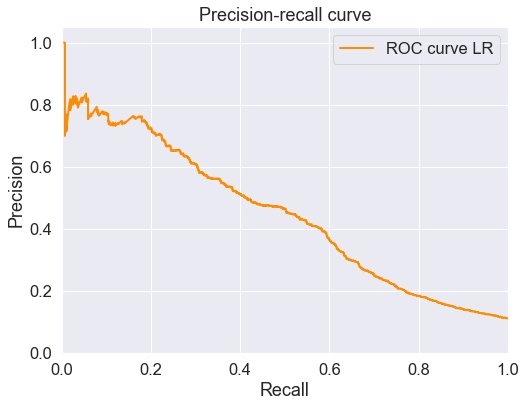

AUC-PR = 0.44846
Время обучения: 0.5726456642150879


In [33]:
scaler = StandardScaler()

start= t.time()

data_train = pd.DataFrame(scaler.fit(column_transformer1.transform(X_train)).transform(column_transformer1.transform(X_train)))
data_test = pd.DataFrame(scaler.fit(column_transformer1.transform(X_test)).transform(column_transformer1.transform(X_test)))

clf = LogisticRegression(max_iter=100000)
clf.fit(data_train, y_train)

indices = pd.Series(abs(clf.coef_[0])).nlargest(40).index.values
X_train_new = data_train[indices]
X_test_new = data_test[indices]

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train_new, y_train)

fin = t.time()

y_pred = clf.predict_proba(X_test_new)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin - start))

**Ответ:** Качество стало лучше, это не может не радовать.

### Методы фильтрации


Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(j) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu$, $\sigma$, $n$ соответственно среднее, стандартное отклонение и количество объектов каждого из классов.

__Задание 9 (0.5 балла).__ Оставьте 40 признаков с наибольшим значением $t$ и замерьте качество. Не забудьте замерить скорость отбора признаков в этом случае.



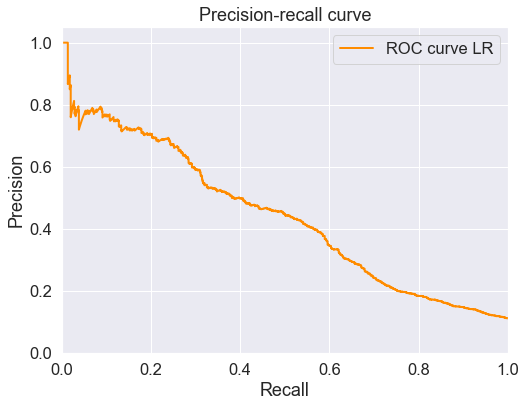

AUC-PR = 0.44168
Время обучения: 0.9081699848175049


In [34]:
def t_stat(arr, y):
    plus = np.where(y == 1, arr, np.nan)
    minus = np.where(y == 0, arr, np.nan)
    mup = np.nanmean(plus)
    mum = np.nanmean(minus)
    npl = np.sum(~np.isnan(plus))
    nm = np.sum(~np.isnan(minus))
    sigmap = np.nanstd(plus)
    sigmam = np.nanstd(minus)
    return abs(mup-mum) / np.sqrt((npl * sigmap ** 2 + nm * sigmam ** 2) / (npl + nm))


tstats = []

start = t.time()

features = column_transformer1.transform(X_train)

for i in range (features.shape[1]):
    tstats.append([t_stat(features[:, i], y_train), i])

tstats = sorted(tstats, reverse = True)

X_train_new = features[:, [tstats[i][1] for i in range(40)]]
X_test_new = column_transformer1.transform(X_test)[:, [tstats[i][1] for i in range(40)]]

clf = LogisticRegression(max_iter=100000)
clf.fit(X_train_new, y_train)

fin = t.time()

y_pred = clf.predict_proba(X_test_new)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin - start))

arr = np.array([0, 0, 0])

### Методы-обёртки

__Задание 10 (1 балл).__ 

Третий из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не окажется выполненым некоторое условие (количество признаков или ухудшение качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите обучающую выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только для финальной оценки качества.

Снова оставьте только 40 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

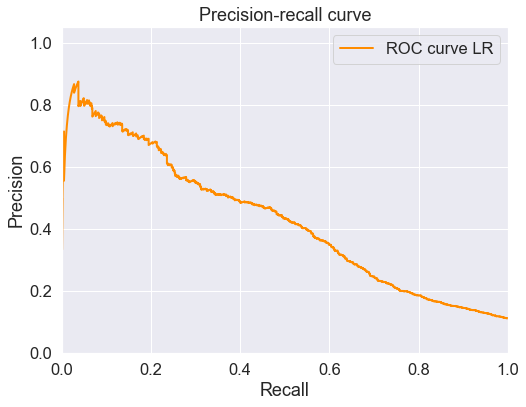

AUC-PR = 0.42802
Время обучения: 534.4891691207886


In [35]:
X_train_train, X_train_test, y_train_train, y_train_test = train_test_split(
    X_train, y_train, test_size=0.5, random_state=21)

start = t.time()

iters = column_transformer.transform(X_train_train).shape[1] - 40

feats = [i for i in range(column_transformer.transform(X_train_train).shape[1])]

for i in range(1, iters + 1):
    min_prec = np.inf
    min_ind = column_transformer.transform(X_train_train).shape[1] + 10
    for j in feats:
        feats_curr = feats.copy()
        feats_curr.remove(j)
        X_train_train_new = column_transformer1.transform(X_train_train)[:, feats_curr]
        X_train_test_new = column_transformer1.transform(X_train_test)[:, feats_curr]
        clf = LogisticRegression(max_iter=100000)
        clf.fit(X_train_train_new, y_train_train)
        y_pred = clf.predict_proba(X_train_test_new)[:, 1]
        if average_precision_score(y_train_test, y_pred) < min_prec:
            min_prec = average_precision_score(y_train_test, y_pred)
            min_ind = j
    feats.remove(min_ind)

X_train_new = column_transformer1.transform(X_train)[:, feats]
X_test_new = column_transformer1.transform(X_test)[:, feats]
clf = LogisticRegression(max_iter=100000)
clf.fit(X_train_new, y_train)

fin = t.time()

y_pred = clf.predict_proba(X_test_new)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin - start))

Стоит отметить, что с помощью такого метода можно пойти и в обратную сторону. Попробуйте _добавлять_ по одному самому полезному признаку в выборку до тех пор, пока не наберется 40 штук. Найдется ли порог, при котором добавление следующих признаков будет только ухудшать качество модели?

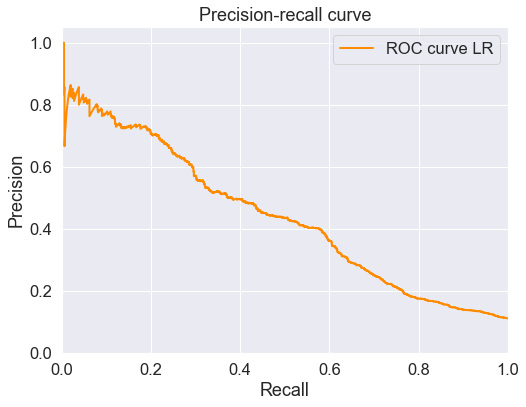

AUC-PR = 0.43939
Время обучения: 338.56570291519165


In [36]:
start = t.time()

indexes = [i for i in range(column_transformer.transform(X_train_train).shape[1])]
feats = []

for i in range(1, 41):
    max_prec = -np.inf
    max_ind = column_transformer.transform(X_train_train).shape[1] + 10
    for j in indexes:
        feats_curr = feats.copy()
        feats_curr.append(j)
        X_train_train_new = column_transformer1.transform(X_train_train)[:, feats_curr]
        X_train_test_new = column_transformer1.transform(X_train_test)[:, feats_curr]
        clf = LogisticRegression(max_iter=100000)
        clf.fit(X_train_train_new, y_train_train)
        y_pred = clf.predict_proba(X_train_test_new)[:, 1]
        if average_precision_score(y_train_test, y_pred) > max_prec:
            max_prec = average_precision_score(y_train_test, y_pred)
            max_ind = j
    feats.append(max_ind)
    indexes.remove(max_ind)

X_train_new = column_transformer1.transform(X_train)[:, feats]
X_test_new = column_transformer1.transform(X_test)[:, feats]
clf = LogisticRegression(max_iter=100000)
clf.fit(X_train_new, y_train)

fin = t.time()

y_pred = clf.predict_proba(X_test_new)[:, 1]

sns.set(font_scale=1.5)
sns.set_color_codes("muted")
plt.figure(figsize=(8, 6))
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
plt.plot(recall, precision, color='darkorange',
         lw=2, label='ROC curve LR')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend()
plt.show()

print("AUC-PR = %.5f" % average_precision_score(y_test, y_pred))
print("Время обучения:", (fin - start))

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ:** Лучшее качество дал встроенный метод при отборе 40 отскалированных признаков. Стоит отметить, что встроенные методы в принципе давали лучшее качество, и работали быстрее других. Самые долгие методы -- Методы обёртки, но и качество на них оказалось худшим. Метод фильтрации вернул среднее значение качества и отработал недолго. Наверное метод обёртки оказался самым интуитивно понятным: отбирать лучшие/худшие признаки, это его плюс. Недостаток это, конечно, алгоритм перебора. Недостаток метода фильтрации это как раз его неочевидность, неясно, откуда берется такая функция. Его плюс это то, что у него небольшая вычислительная сложность, и на нём меньше вероятность переобучиться.

# Часть 3. Оценка экономического эффекта модели

В данной части мы займемся тем, что от вас скорее всего потребуется на реальной работе (помимо перекладки `json`, разумеется). А именно: мы соберем несколько специализированных метрик качества, попытаемся настроить модель на максимизацию _прибыли_ и оценим, сколько вообще получится заработать на этом. Разумеется, здесь будет сделано множество упрощающих жизнь допущений, но обо всем по порядку. 

__Задание 11 (1 балл).__ Допустим, работники вашего колл-центра получают за один звонок клиенту 1 доллар. При согласии клиента на предлагаемые условия он принесет в банк 10 долларов.

Если вы всё прослушали на экономике, то напомним, что выручка — это сколько денег нам принесли клиенты, а прибыль — выручка за вычетом расходов на зарплату и прочее.

Загрузите данные о телемаркетинге из предыдущего блока заданий. В этой части не нужно делить выборку - мы будем использовать кросс-валидацию. Используйте 5 фолдов, сделайте `shuffle=True, random_state=500`. По кросс-валидации у вас получится 5 вариантов обучающей и тестовой выборки. Обучите логистическую регрессию на каждой обучающей выборке (воспользуйтесь one-hot для категориальных признаков, гиперпараметры оставьте со значениями по умолчанию) и сделайте предсказания для соответствующих тестовых выборок. Допустим, всем положительным прогнозам ваши сотрудники решили позвонить. Посчитайте на всех тестовых выборках выручку и усредните. Сколько денег вы в среднем заработаете? Также вычислите стандартное отклонение.

Сколько из заработанных денег придётся отдать операторам вашего колл-центра?

In [37]:
from sklearn.model_selection import KFold


df = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')
y = (df["y"] == 'yes')
X = df.drop(columns=["y", "duration"])

column_transformer = ColumnTransformer([
    ('oe', OneHotEncoder(), categorical),
], remainder='passthrough')

pipeline = Pipeline(steps=[
    ('oe', column_transformer),
    ('logreg', LogisticRegression(max_iter=100000))
])

proceeds = []
expenses = 0

kf = KFold(n_splits=5, shuffle=True, random_state=500)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    model = pipeline.fit(X_train, y_train)
    y_pred = model.decision_function(X_test)
    expenses += y_pred[y_pred > 0].shape[0]
    proceeds.append(np.sum(np.where(y_test[y_pred > 0] == 1, 1, 0)) * 10)
    
print("Mean proceeds:", np.mean(np.array(proceeds)))
print("Standard deviation: %.5f" % np.std(np.array(proceeds)))
print("Expenses:", expenses)

Mean proceeds: 2122.0
Standard deviation: 84.71127
Expenses: 1589


Внесем некоторую долю случайности. Пусть теперь согласный на условия клиент будет приносить не 10 долларов, а случайную величину, равномерно распределенную в интервале $[0;20)$. Проделайте все те же самые действия. Для имитации реальной ситуации **НЕ** фиксируйте `random_seed` при подсчете выручки с клиента. Что получилось?

In [38]:
proceeds = []
expenses = 0

# kf = KFold(n_splits=5, shuffle=True, random_state=500)

for train_index, test_index in kf.split(X):
    X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
    y_train, y_test = y[train_index], y[test_index]
    model = pipeline.fit(X_train, y_train)
    y_pred = model.decision_function(X_test)
    expenses += y_pred[y_pred > 0].shape[0]
    proceeds.append(np.sum(np.random.uniform(0, 20, np.sum(np.where(y_test[y_pred > 0] == 1, 1, 0)))))
    
print("Mean proceeds: %.3f" % np.mean(np.array(proceeds)))
print("Standard deviation: %.3f" % np.std(np.array(proceeds)))
print("Expenses:", expenses)

Mean proceeds: 2137.425
Standard deviation: 73.891
Expenses: 1589


Настройте по кросс-валидации коэффициент регуляризации модели для максимизации прибыли (считайте как случайную величину выше). Удалось ли получить какой-то выигрыш? При каком коэффициенте регуляризациии прибыль максимальна? Постройте график зависимости ожидаемой прибыли от коэффициента, также укажите стандартные отклонения (вам поможет `plt.errorbar`).

In [39]:
from sklearn.metrics import make_scorer
from sklearn.pipeline import make_pipeline


def profit(y, pred):
    y_calls = y[pred > 0]
    return np.random.uniform(0, 20, int(y_calls.sum())).sum() - len(y_calls)


c = np.logspace(-1, 6, 7)

X_transformed = column_transformer.transform(X)
score = make_scorer(profit, greater_is_better=True)
searcher = GridSearchCV(LogisticRegression(max_iter=100000), [{"C": c}], scoring=score, cv=kf, n_jobs=-1)
searcher.fit(X_transformed, y)
best_par = searcher.best_params_["C"]

print("Best parameter = %.4f" % best_par)
print("Mean earnings for best parameter: %.4f" % searcher.cv_results_['mean_test_score'].max())

Best parameter = 68129.2069
Mean earnings for best parameter: 1898.9602


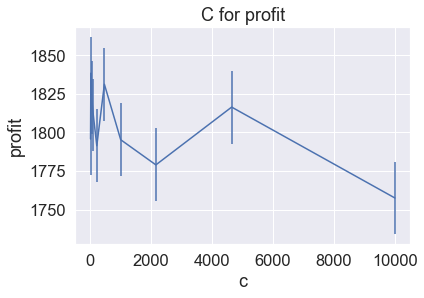

In [40]:
CS = np.logspace(1, 4, 10)
profits_all = []
for c in CS:
    profits = []
    pipeline = Pipeline(steps=[
        ('oe', column_transformer),
        ('logreg', LogisticRegression(max_iter=100000, C=c))
    ])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.loc[train_index, :], X.loc[test_index, :]
        y_train, y_test = y[train_index], y[test_index]
        model = pipeline.fit(X_train, y_train)
        y_pred = model.decision_function(X_test)
        profits.append(profit(y_test, y_pred))
    profits_all.append(np.mean(np.array(profits)))

    
yerr = np.std(np.array(profits_all))
plt.errorbar(CS, profits_all, yerr=yerr)
plt.xlabel("c")
plt.ylabel("profit")
plt.title('C for profit')
plt.show()

Попробуйте запустить перебор несколько раз. Находится ли каждый раз один и тот же "лучший" коэффициент? Присутствует ли какая-то закономерность? Какие вы можете сделать из этого выводы?

In [41]:
c = np.logspace(-1, 5, 10)

for i in range(10):
    score = make_scorer(profit, greater_is_better=True)
    searcher = GridSearchCV(LogisticRegression(max_iter=100000), [{"C": c}], scoring=score, cv=kf, n_jobs=-1)
    searcher.fit(X_transformed, y)
    best_par = searcher.best_params_["C"]

    print("Best parameter = %.4f" % best_par)

Best parameter = 100000.0000
Best parameter = 10.0000
Best parameter = 21544.3469
Best parameter = 100000.0000
Best parameter = 1000.0000
Best parameter = 46.4159
Best parameter = 2.1544
Best parameter = 46.4159
Best parameter = 46.4159
Best parameter = 10.0000


**Ответ:** Каждый раз коэффициент различный. Это довольно предсказуемо, судя по тому, что сама по себе прибыль каждый раз случайное число, то есть коэффициенту в принципе трудно совпасть. Закономерность в том, что значение всегда больше 1. Судя по графику выше значение прибыли варьируется каждый разпримерно на 40 условных единиц, это не такое огромное различие. В использовании подбора коэффециента на реальных данных такой многоразовый перебор вряд ли дал бы сильно лучшее или сильно худшее значение.

__Задание 12 (1 балл).__ Выше мы уже описали примерную экономическую модель вашей задачи. Как вы считаете, что для вашего бизнеса важнее — хороший precision или recall модели? Почему?

__Ответ:__ *Precision можно интерпретировать как долю объектов, названных классификатором положительными и при этом являющимися положительными, а recall показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм.* Из такого определния можно сделать вывод, что для бизнеса важнее окажется precision. Таким образом, мы будем более уверены в том, что позвоним людям, которых нам посоветовала модель, мы получим прибыль, то есть согласие на работу с нами. Recall показывает скольким из потенциальных покупателей мы позвоним, но это никак не советует нам, как лучше поступить и улучшить прибыль. Мы не уверены в данной ситуации, хорошо или плохо работаем, остались ли мы в выигрыше или вышли в ноль.



Вспомним, что на самом деле логистическая регрессия предсказывает нам вероятности положительного класса для объекта. Возможно, путем настройки порога бинаризации этих вероятностей мы сможем получить какой-то выигрыш? Проверьте ваши рассуждения выше с помощью настройки порога бинаризации на кросс-валидации для максимизации прибыли. Воспользуйтесь сеткой от 0 до 1 с шагом 0.01. Напомним, что снижение порога дает нам более высокий recall и более низкий precision, и наоборот.

In [42]:
#your code here

Постройте график зависимости прибыли от порога бинаризации, также отметьте на нем стандартные отклонения. Выделите наилучший порог. 


__Вопрос:__ Замечаете ли вы какую-то закономерность? Для правильного ответа на этот вопрос попробуйте запустить несколько раз и задумайтесь, почему порог получается в какой-то конкретной области?

In [43]:
#your code here

Каковы значения precision и recall на выбранном пороге? Оцените по кросс-валидации. Также вычислите стандартное отклонение.

In [44]:
#your code here

Как вы, вероятно, уже поняли, ваша модель склоняется к более высокому recall. Попробуйте оценить качество модели с помощью `PR-AUC` в зоне recall $\geq$ 0.5. Сделайте это следующим образом - выберите только те пороги, на которых достигается необходимый recall, затем интерпретируйте отсеченный в единичном квадрате прямоугольник как новый единичный квадрат и посчитайте площадь под отсеченной кривой. 

In [45]:
#your code here

__Бонус (0.01 балла):__ что вы кушали в день сдачи данного ДЗ на завтрак?

__Ответ:__